# 1.Install Libraries

In [1]:
# for collecting the html
! pip3 install requests


# for scrapping the table
! pip3 install html-table-parser-python3

# for scrapping from each html
! pip3 install beautifulsoup4

# for getting the country details 
# ! pip install geograpy3


# # for EDA and Prediction
# ! pip install pandas-profiling==2.8.0  -q
# ! pip install pycaret[full] --q

## libraries

In [ ]:
# for scrapping the data from website

import urllib.request as request
from html_table_parser import HTMLTableParser
import pandas as pd
import nltk
import requests
from bs4 import BeautifulSoup
import re

# for Eda 

import pandas_profiling
import plotly.express as px

# for analytics and Prediction
from sklearn import set_config as sg
sg(display="diagram")
from sklearn.decomposition import PCA

import pycaret
from pycaret.classification import get_config,setup
from pycaret.classification import compare_models,create_model,tune_model,finalize_model,save_model,predict_model,load_model,get_config,plot_model
from pycaret.classification import remove_metric

import pandas as pd
import seaborn as sns
import numpy as np

import geograpy


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import pycountry

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
pycaret.__version__

'2.3.0'

In [ ]:
url = 'http://www.howstat.com/cricket/Statistics/Matches/MatchListCountry_ODI.asp?A=IND'
page = requests.get(url)

dfs = pd.read_html(url)

In [ ]:
dfs[7]

,0,1,2,3,4
0,NaN,Date,Series,Ground,Result
1,1.0,13/07/1974,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets
2,2.0,15/07/1974,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets
3,3.0,07/06/1975,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs
4,4.0,11/06/1975,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets
...,...,...,...,...,...
989,989.0,29/11/2020,2020-2021 Australia v. India,Sydney Cricket Ground,Australia won by 51 runs
990,990.0,02/12/2020,2020-2021 Australia v. India,Manuka Oval,India won by 13 runs
991,991.0,23/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,India won by 66 runs
992,992.0,26/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,England won by 6 wickets


# country using geograpy Error

In [ ]:
geograpy.get_place_context(text='Mumbai')

unzipping /usr/local/lib/python3.7/dist-packages/geograpy/locs.db from /usr/local/lib/python3.7/dist-packages/geograpy/locs.db.gz


In [ ]:
# country_name_list = []
# for country in pycountry.countries:
#     country_name_list.append(country.name)

# for i in range(1,df.count()[0]):
#   country = geograpy.get_place_context(text=df['Series'][i])
#   for name in country.regions:
#     if name in country_name_list and name!= 'India':
#       print(i,name)
#       df['Country'][i] = name

#       break
#   else:
#     for name in country.cities:
#       if name!='Benson':
#         print(i,name)

#         df['Country'][i] = name
#         break
#     else:
#       for name in country.other:
#         print(i,name)

#         df['Country'][i] = name


KeyError: ignored

# 2.Scrapping

## Scrapping Links Tables



In [ ]:
class Scrapper():
    """ for scrapping table """


    def __init__(self,url):
      self.url = url


    def links(self):
      page = requests.get(self.url)
      soup = BeautifulSoup(page.content, 'html.parser')
      links = []
      for link in soup.findAll('a'):
        links.append(link.get('href'))
      return links



    def url_get_contents(self):
        """ Opens a website and read its binary contents (HTTP Response Body) """
        req = request.Request(self.url)
        f = request.urlopen(req)
        xhtml = f.read().decode('utf-8')
        self.p = HTMLTableParser()
        self.p.feed(xhtml)

    def to_table(self,table_index,column_names=None):
        if column_names:
            dataframe = pd.DataFrame(self.p.tables[table_index],columns=column_names)
            return dataframe
        else:
            return pd.DataFrame(self.p.tables[table_index])

In [ ]:
url = 'http://www.howstat.com/cricket/Statistics/Matches/MatchListCountry_ODI.asp?A=IND'

b = Scrapper(url=url)
b.url_get_contents()

df_scrapped = b.to_table(table_index=5,column_names=['Index','Date','Series','Ground','result'])


## Scrapping Target score and first bat

In [ ]:
def getNumbers(str):
    """ library re is used """

    array = re.findall(r'[0-9]+', str)
    return array


def link_num(text,pattern):
    try:
      if pattern in text:
        return (getNumbers(text))
    except Exception:
      pass

In [ ]:
# collect all hyperlink from the html

url = 'http://www.howstat.com/cricket/Statistics/Matches/MatchListCountry_ODI.asp?A=IND'

b = Scrapper(url=url)
links_scrapped = b.links()

In [ ]:
# http://www.howstat.com/cricket/Statistics/Matches/MatchScorecard_ODI.asp?MatchCode=0059  sample hyperlink

# code ''0059' is extracted from each link

link_code =[]

for i in links_scrapped:
    if link_num(i,'MatchCode='):  # passing value to above function 
        link_code.append(link_num(i,'MatchCode='))


In [ ]:
url = 'http://www.howstat.com/cricket/Statistics/Matches/MatchScorecard_ODI.asp?MatchCode={number}'  # formatted links for iterating with link code

Target = []
first_bat = []

for i in link_code:
    new_url = url.format(number=i[0])

# table in the link is scrapped
    obj = Scrapper(url=new_url)
    obj.url_get_contents()

# for getting the target score value
    scrap = obj.to_table(7)
    score = scrap[0][2] 
    Target.append(getNumbers(score))

# for getting the first batting
    scrap = obj.to_table(5)
    fir_bt = scrap[0][0]
    first_bat.append([fir_bt])


# 3.Collecting the Dataset

In [ ]:

# for getting country name from text

def to_country(text,co_not=None):
    """ pycountry library used """

    country_name_list = []

    for country in pycountry.countries:
        country_name_list.append(country.name)
    country_name_list.extend(['England','East Africa','West Indies','Scotland'])  # additional country name

    for name in country_name_list:
        if name in text:
            if name!=co_not:
              return name


# function for adding new columns

def column_add(df,column_name,lis,form=str):
    df[column_name] = None

    for i in range(df.count()[0]):
        try:
            if lis[i]:
                df[column_name][i] = form(lis[i][0])
            else:
                df[column_name][i] = None
        except Exception:
            df[column_name][i] = None
    return df

In [ ]:
df_scrapped.head(10)
df = df_scrapped.drop([0]).drop(['Index'],axis=1).reset_index(drop=True)

In [ ]:
df.count()

Date      993
Series    993
Ground    993
result    993
dtype: int64

In [ ]:
df.head(5)

,Date,Series,Ground,result
0,13/07/1974,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets
1,15/07/1974,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets
2,07/06/1975,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs
3,11/06/1975,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets
4,14/06/1975,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets


In [ ]:
# New Columns are added


# Create a new column of opposition country
df['Versus'] = 'default value'


for i in range(df.count()[0]):
  text = df['Series'][i]
  name = to_country(text,'India')  # country other than india is selected from each test series
  df['Versus'][i] = name


# First bat
column_add(df,'First Batting',first_bat) # column_add function is called


# Target runs 
column_add(df,'Target Runs',Target,int)  # column_add function is called

#



# label column yes = 1, no = 0
df['Label'] = None

for i in range(df.count()[0]):
  text = df['result'][i]
  if "India" in text:
      df['Label'][i] = 1
  elif 'No Result' in text:
      df['Label'][i] = None
  else:
      df['Label'][i] = 0


In [ ]:
df.tail(2)

,Date,Series,Ground,result,Versus,First Batting,Target Runs,Label
991,26/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,England won by 6 wickets,England,India,337,0
992,28/03/2021,2020-2021 India v. England,Maharashtra Cricket Association Stadium,India won by 7 runs,England,India,330,1


## to download the csv

In [ ]:
# df.to_csv('Scrapped_cricket.csv')
# from google.colab import files
# # files.download('Scrapped_cricket.csv')

# 3.1load csv from local

In [ ]:
df_org = pd.read_csv('/content/Scrapped_cricket.csv')

# 4.EDA

Refining the dataframe before Eda

In [ ]:
if 'df_org' not in globals():
    df_org = df.copy(deep=True)
    

In [ ]:
df = df_org.loc[:,['Date','Ground','Versus','Target Runs','First Batting','Label']]

In [ ]:
pandas_profiling.ProfileReport(df)

# Preprcoessing

In [ ]:
df.isnull().sum()

Date              0
Ground            0
Versus            0
Target Runs      25
First Batting     0
Label            41
dtype: int64

In [ ]:
df

,Date,Ground,Versus,Target Runs,First Batting,Label
0,13/07/1974,Headingley,England,266.0,India,0.0
1,15/07/1974,Kennington Oval,England,172.0,India,0.0
2,07/06/1975,Lord's,England,335.0,England,0.0
3,11/06/1975,Headingley,East Africa,121.0,East Africa,1.0
4,14/06/1975,Old Trafford,New Zealand,231.0,India,0.0
...,...,...,...,...,...,...
988,29/11/2020,Sydney Cricket Ground,Australia,390.0,Australia,0.0
989,02/12/2020,Manuka Oval,Australia,303.0,India,1.0
990,23/03/2021,Maharashtra Cricket Association Stadium,England,318.0,India,1.0
991,26/03/2021,Maharashtra Cricket Association Stadium,England,337.0,India,0.0


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [ ]:
df.shape

(952, 6)

In [ ]:
df.describe(include="object")

,Ground,Versus,First Batting
count,952,952,952
unique,133,20,17
top,Sharjah Cricket Stadium,Sri Lanka,India
freq,72,153,446


## unseen dataset for future prediction

In [ ]:
df_seen = df.sample(frac=0.995, random_state=12)  
df_unseen = df.drop(df_seen.index).reset_index(drop=True) 
df_seen.reset_index(drop=True)

print('Data for Modeling: ' + str(df_seen.shape))
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Data for Modeling: (947, 6)
Unseen Data For Predictions: (5, 6)


In [ ]:
df_unseen

,Date,Ground,Versus,Target Runs,First Batting,Label
0,1994-10-17,Nahar Singh Stadium,West Indies,274.0,West Indies,0.0
1,1995-02-22,Carisbrook,Australia,251.0,Australia,1.0
2,1999-08-28,Sinhalese Sports Club Ground,Australia,253.0,Australia,0.0
3,2008-11-17,Holkar Cricket Stadium,England,293.0,India,1.0
4,2015-06-24,Shere Bangla National Stadium,Bangladesh,318.0,India,1.0


## Pycaret Preprocessing

In [ ]:
preprocessed_data =setup(data = df_seen, target = 'Label', session_id=123 ,                                 
                          normalize=True,transformation=True,
                          remove_multicollinearity=True,
                          remove_outliers=True,
                          categorical_imputation="mode",
                          combine_rare_levels=True,   
                          feature_selection=True,
                          ignore_low_variance=True,
                          data_split_stratify=True,
                          silent=True,use_gpu=True,
                          experiment_name='employee_experiment_1')
                  

,Description,Value
0,session_id,123
1,Target,Label
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(947, 6)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
get_config("X")

,Ground_Lords,Versus_Kenya,First Batting_Pakistan,Date_month_10,Target Runs,Ground_Nehru Stadium (Margao),Versus_New Zealand,Ground_Reliance Stadium,Date_month_9,Ground_MA Chidambaram Stadium,Ground_Sher-I-Kashmir Stadium,Ground_Punjab Cricket Association IS Bindra Stadium,Ground_Green Park,Ground_St Georges Park,First Batting_Zimbabwe,Ground_Eden Gardens,First Batting_India,Ground_Wankhede Stadium,Ground_others_infrequent,Ground_Sinhalese Sports Club Ground,Ground_Melbourne Cricket Ground,Date_weekday_4,Ground_Kennington Oval,Date_month_2,Versus_Sri Lanka,Date_weekday_6,Ground_National Stadium (Karachi),Versus_England,Ground_Kinrara Academy Oval,Date_weekday_5,First Batting_Australia,Ground_Bangabandhu National Stadium,Versus_Pakistan,Versus_Bangladesh,Ground_Indira Priyadarshini Stadium,Ground_Adelaide Oval,Ground_Headingley,Date_is_month_end_1,Ground_Sydney Cricket Ground,Date_month_11,...,Date_month_7,Date_weekday_0,Ground_Sharjah Cricket Stadium,Date_is_month_start_1,Ground_Eden Park,Versus_Australia,Ground_Captain Roop Singh Stadium,Date_month_12,First Batting_Sri Lanka,Date_weekday_3,First Batting_West Indies,Date_weekday_2,Ground_Dubai International Cricket Stadium,Ground_Rangiri Dambulla International Stadium,Ground_Madhavrao Scindia Cricket Ground,Versus_South Africa,Date_month_3,Ground_Holkar Cricket Stadium,Date_month_5,Date_month_4,Ground_Kingsmead,First Batting_South Africa,Ground_Shere Bangla National Stadium,Ground_Vidarbha Cricket Association Ground,Versus_West Indies,Ground_Buffalo Park,Date_month_8,Ground_Maharashtra Cricket Association Stadium,Ground_Queens Park Oval,Ground_SuperSport Park,Ground_Barabati Stadium,Date_weekday_1,Date_month_1,Ground_Basin Reserve,First Batting_Bangladesh,Date_month_6,Ground_Gymkhana Club Ground,Ground_Trent Bridge,First Batting_England,Ground_Keenan Stadium
374,0.0,0.0,1.0,0.0,0.867706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
829,0.0,0.0,0.0,0.0,0.785283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
842,0.0,0.0,0.0,0.0,-0.636283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
386,0.0,0.0,0.0,0.0,-0.181681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,0.0,0.0,0.0,1.0,0.030307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.0,0.0,0.0,0.0,-0.034994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
get_config("y")

374    0
829    1
842    0
386    1
177    1
      ..
278    0
432    1
844    1
259    1
642    1
Name: Label, Length: 947, dtype: int64

In [ ]:
get_config("X_train")

,Ground_Lords,Versus_Kenya,First Batting_Pakistan,Date_month_10,Target Runs,Ground_Nehru Stadium (Margao),Versus_New Zealand,Ground_Reliance Stadium,Date_month_9,Ground_MA Chidambaram Stadium,Ground_Sher-I-Kashmir Stadium,Ground_Punjab Cricket Association IS Bindra Stadium,Ground_Green Park,Ground_St Georges Park,First Batting_Zimbabwe,Ground_Eden Gardens,First Batting_India,Ground_Wankhede Stadium,Ground_others_infrequent,Ground_Sinhalese Sports Club Ground,Ground_Melbourne Cricket Ground,Date_weekday_4,Ground_Kennington Oval,Date_month_2,Versus_Sri Lanka,Date_weekday_6,Ground_National Stadium (Karachi),Versus_England,Ground_Kinrara Academy Oval,Date_weekday_5,First Batting_Australia,Ground_Bangabandhu National Stadium,Versus_Pakistan,Versus_Bangladesh,Ground_Indira Priyadarshini Stadium,Ground_Adelaide Oval,Ground_Headingley,Date_is_month_end_1,Ground_Sydney Cricket Ground,Date_month_11,...,Date_month_7,Date_weekday_0,Ground_Sharjah Cricket Stadium,Date_is_month_start_1,Ground_Eden Park,Versus_Australia,Ground_Captain Roop Singh Stadium,Date_month_12,First Batting_Sri Lanka,Date_weekday_3,First Batting_West Indies,Date_weekday_2,Ground_Dubai International Cricket Stadium,Ground_Rangiri Dambulla International Stadium,Ground_Madhavrao Scindia Cricket Ground,Versus_South Africa,Date_month_3,Ground_Holkar Cricket Stadium,Date_month_5,Date_month_4,Ground_Kingsmead,First Batting_South Africa,Ground_Shere Bangla National Stadium,Ground_Vidarbha Cricket Association Ground,Versus_West Indies,Ground_Buffalo Park,Date_month_8,Ground_Maharashtra Cricket Association Stadium,Ground_Queens Park Oval,Ground_SuperSport Park,Ground_Barabati Stadium,Date_weekday_1,Date_month_1,Ground_Basin Reserve,First Batting_Bangladesh,Date_month_6,Ground_Gymkhana Club Ground,Ground_Trent Bridge,First Batting_England,Ground_Keenan Stadium
113,0.0,0.0,0.0,0.0,-0.441746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
85,0.0,0.0,0.0,0.0,-0.051308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,1.0,-2.549731,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,0.0,0.0,0.0,1.0,0.686457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,0.0,0.0,0.0,0.0,-0.197961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.0,0.0,0.0,0.0,0.884198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [ ]:
get_config("y_train")

113    1
85     1
50     0
887    0
566    1
      ..
81     0
242    1
423    0
705    0
797    0
Name: Label, Length: 628, dtype: int64

In [ ]:
get_config("X_test")

,Ground_Lords,Versus_Kenya,First Batting_Pakistan,Date_month_10,Target Runs,Ground_Nehru Stadium (Margao),Versus_New Zealand,Ground_Reliance Stadium,Date_month_9,Ground_MA Chidambaram Stadium,Ground_Sher-I-Kashmir Stadium,Ground_Punjab Cricket Association IS Bindra Stadium,Ground_Green Park,Ground_St Georges Park,First Batting_Zimbabwe,Ground_Eden Gardens,First Batting_India,Ground_Wankhede Stadium,Ground_others_infrequent,Ground_Sinhalese Sports Club Ground,Ground_Melbourne Cricket Ground,Date_weekday_4,Ground_Kennington Oval,Date_month_2,Versus_Sri Lanka,Date_weekday_6,Ground_National Stadium (Karachi),Versus_England,Ground_Kinrara Academy Oval,Date_weekday_5,First Batting_Australia,Ground_Bangabandhu National Stadium,Versus_Pakistan,Versus_Bangladesh,Ground_Indira Priyadarshini Stadium,Ground_Adelaide Oval,Ground_Headingley,Date_is_month_end_1,Ground_Sydney Cricket Ground,Date_month_11,...,Date_month_7,Date_weekday_0,Ground_Sharjah Cricket Stadium,Date_is_month_start_1,Ground_Eden Park,Versus_Australia,Ground_Captain Roop Singh Stadium,Date_month_12,First Batting_Sri Lanka,Date_weekday_3,First Batting_West Indies,Date_weekday_2,Ground_Dubai International Cricket Stadium,Ground_Rangiri Dambulla International Stadium,Ground_Madhavrao Scindia Cricket Ground,Versus_South Africa,Date_month_3,Ground_Holkar Cricket Stadium,Date_month_5,Date_month_4,Ground_Kingsmead,First Batting_South Africa,Ground_Shere Bangla National Stadium,Ground_Vidarbha Cricket Association Ground,Versus_West Indies,Ground_Buffalo Park,Date_month_8,Ground_Maharashtra Cricket Association Stadium,Ground_Queens Park Oval,Ground_SuperSport Park,Ground_Barabati Stadium,Date_weekday_1,Date_month_1,Ground_Basin Reserve,First Batting_Bangladesh,Date_month_6,Ground_Gymkhana Club Ground,Ground_Trent Bridge,First Batting_England,Ground_Keenan Stadium
879,0.0,0.0,0.0,0.0,-0.344320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,0.0,0.0,0.0,0.0,-2.149580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
594,0.0,0.0,0.0,0.0,0.210216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,1.0,0.0,-0.636283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,-0.376808,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,0.0,0.0,0.0,0.0,1.363391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
get_config("y_test")

879    1
817    1
594    1
60     0
37     0
      ..
869    0
510    1
816    1
539    0
145    0
Name: Label, Length: 285, dtype: int64

In [ ]:
get_config("prep_pipe")

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Label',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1, random_state=123,
                                                    subclass='binary',
                                                    target='Label',
                                                    top_features_to_pick=0.19999999999999996)),
                ('fix_multi',
                 Fix_multicollinearity(correlation_with_target_preference=None,
                                       correlation_with_target_threshold=0.0,
                                       target_variable='Label',
                                       threshold=0.9)),
                ('dfs', 'passthrough'), ('pca', 'passthrough')],
         verbose=False)

In [ ]:
setup_df_train_x = get_config('X_train')
setup_df_train_y = get_config('y_train')

In [ ]:
# PCA 1

pca=PCA(n_components=2)


Principal_Component = pca.fit_transform(setup_df_train_x)
Pricipal_component_df = pd.DataFrame(Principal_Component,columns=["Princ_comp1","Princ_comp2"])

df_Pca_1 = pd.merge(Pricipal_component_df,setup_df_train_y,left_index=True,right_index=True)
df_Pca_1.head()

,Princ_comp1,Princ_comp2,Label
0,-0.447251,0.478937,0
2,-2.569872,-0.739370,0
4,-0.229083,-0.556143,0
5,0.761154,-0.566399,0
6,-0.749515,0.559829,0


In [ ]:
pca_fig = px.scatter(df_Pca_1, x="Princ_comp1",y="Princ_comp2",color="Label")
pca_fig.show()

In [ ]:
# PCA 2

pca=PCA(n_components=3)


Principal_Component = pca.fit_transform(setup_df_train_x)
Pricipal_component_df = pd.DataFrame(Principal_Component,columns=["Princ_comp1","Princ_comp2",'Princ_comp3'])

df_Pca_2 = pd.merge(Pricipal_component_df,setup_df_train_y,left_index=True,right_index=True)
df_Pca_2.head()

,Princ_comp1,Princ_comp2,Princ_comp3,Label
0,-0.447254,0.478993,-0.167621,0
2,-2.569871,-0.739173,-0.311238,0
4,-0.229084,-0.556351,0.137882,0
5,0.761154,-0.566555,0.133124,0
6,-0.749515,0.559921,-0.327315,0


In [ ]:
pca_fig = px.scatter_3d(df_Pca_2, x="Princ_comp1",y="Princ_comp2",z='Princ_comp3',color="Label")
pca_fig.show()

# Compare model and find best model

In [ ]:
remove_metric("Kappa")
remove_metric("MCC")

In [ ]:
compare_models(include=['catboost','knn','rf','xgboost','rbfsvm',],cross_validation=False,sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,TT (Sec)
catboost,CatBoost Classifier,0.6772,0.7347,0.7273,0.6914,0.7089,1.37
xgboost,Extreme Gradient Boosting,0.6386,0.6912,0.6753,0.6624,0.6688,0.81
rf,Random Forest Classifier,0.6386,0.6660,0.6623,0.6667,0.6645,0.77
knn,K Neighbors Classifier,0.6246,0.6586,0.6364,0.6577,0.6469,0.01
rbfsvm,SVM - Radial Kernel,0.5509,0.6176,0.9740,0.5474,0.7009,0.28


In [ ]:
best_models=compare_models(include=['catboost','knn','xgboost'],n_select=7,sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,TT (Sec)
catboost,CatBoost Classifier,0.6738,0.7273,0.7079,0.6962,0.6995,1.308
xgboost,Extreme Gradient Boosting,0.6545,0.6960,0.6930,0.6778,0.6831,0.415
knn,K Neighbors Classifier,0.6164,0.6467,0.6398,0.6480,0.6396,0.212


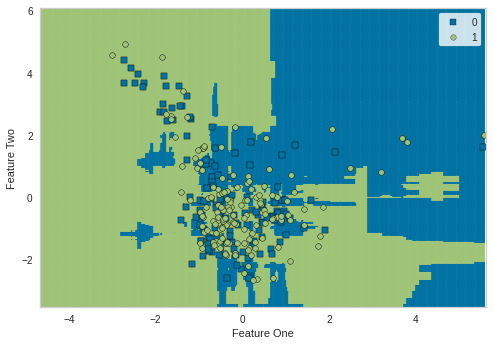

In [ ]:
plot_model(best_models[0],"boundary")

# Hyper_catboost_tuning

In [ ]:
import decimal
def float_range(start, stop, step):
  while start < stop:
    yield float(start)
    start += float(decimal.Decimal(step))

In [ ]:
best_models[0].get_params()

{'border_count': 254,
 'random_state': 123,
 'task_type': 'CPU',
 'verbose': False}

In [ ]:
best_models[0].get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'Logloss',
 'feature_border_type': 'GreedyLogSum',
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.008445999585092068,
 'loss_function': 'Logloss',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 123,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fraction': 

In [ ]:
params = {'task_type':['GPU'],
          'bagging_temperature':[i for i in float_range(.3,0.8,.001)],
          'border_count':[i for i in range(50,100,50)],
          
          'depth': [i for i in range(1,8)],
          'iterations': [i for i in range(1,300,50)],
          'l2_leaf_reg': [i for i in range(1,20)],
          
          'learning_rate':[ i for i in float_range(.01,.25,.001)],
          'random_strength':[ i for i in float_range(.1,5,.001)],
          'scale_pos_weight':[i for i in float_range(0.4,1.5,.001)]
          
          
          }
tuned_catboost_custom = tune_model(best_models[0], custom_grid = params,n_iter=50,optimize='AUC',choose_better=True,tuner_verbose=True,search_algorithm='random',)




,Accuracy,AUC,Recall,Prec.,F1
0,0.6667,0.7627,0.8235,0.6512,0.7273
1,0.6984,0.7961,0.8529,0.6744,0.7532
2,0.7302,0.7728,0.8529,0.7073,0.7733
3,0.6825,0.7323,0.7941,0.6750,0.7297
4,0.6825,0.7059,0.7647,0.6842,0.7222
5,0.6508,0.7454,0.7353,0.6579,0.6944
6,0.6508,0.7241,0.7941,0.6429,0.7105
7,0.6825,0.7596,0.7353,0.6944,0.7143
8,0.7097,0.7405,0.8235,0.7000,0.7568
9,0.7419,0.8098,0.7576,0.7576,0.7576


In [ ]:
tuned_catboost_custom.get_params()

{'bagging_temperature': 0.6650000000000003,
 'border_count': 220,
 'depth': 3,
 'iterations': 51,
 'l2_leaf_reg': 9,
 'learning_rate': 0.1440000000000001,
 'random_state': 123,
 'random_strength': 1.9629999999998946,
 'scale_pos_weight': 0.6000000000000002,
 'task_type': 'GPU',
 'verbose': False}

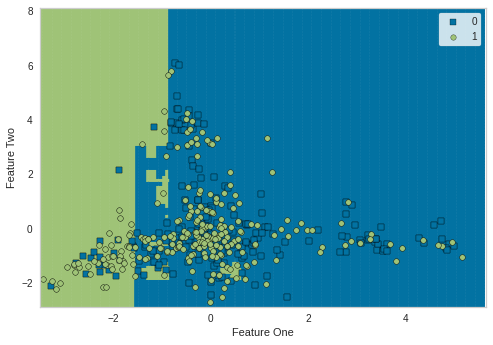

In [ ]:
plot_model(tuned_catboost_custom,"boundary")

In [ ]:
final = finalize_model(tuned_catboost_custom)

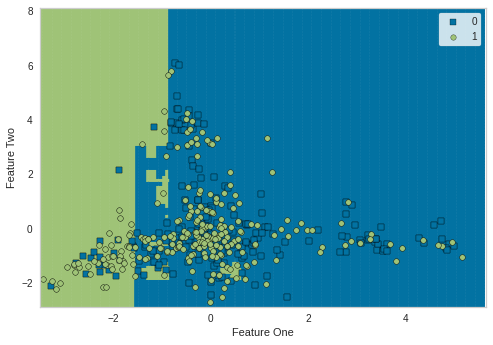

In [ ]:
plot_model(final,"boundary")

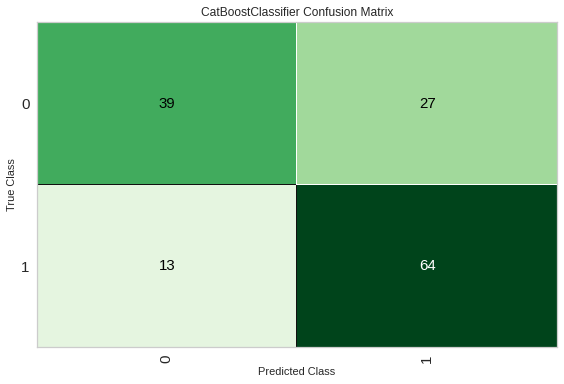

In [ ]:
plot_model(final,plot="confusion_matrix")#save=True)

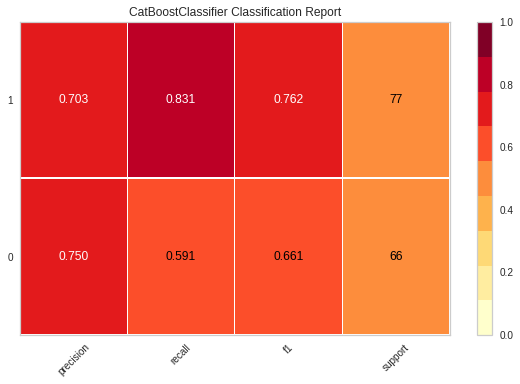

In [ ]:
plot_model(final,plot="class_report")#save=True)

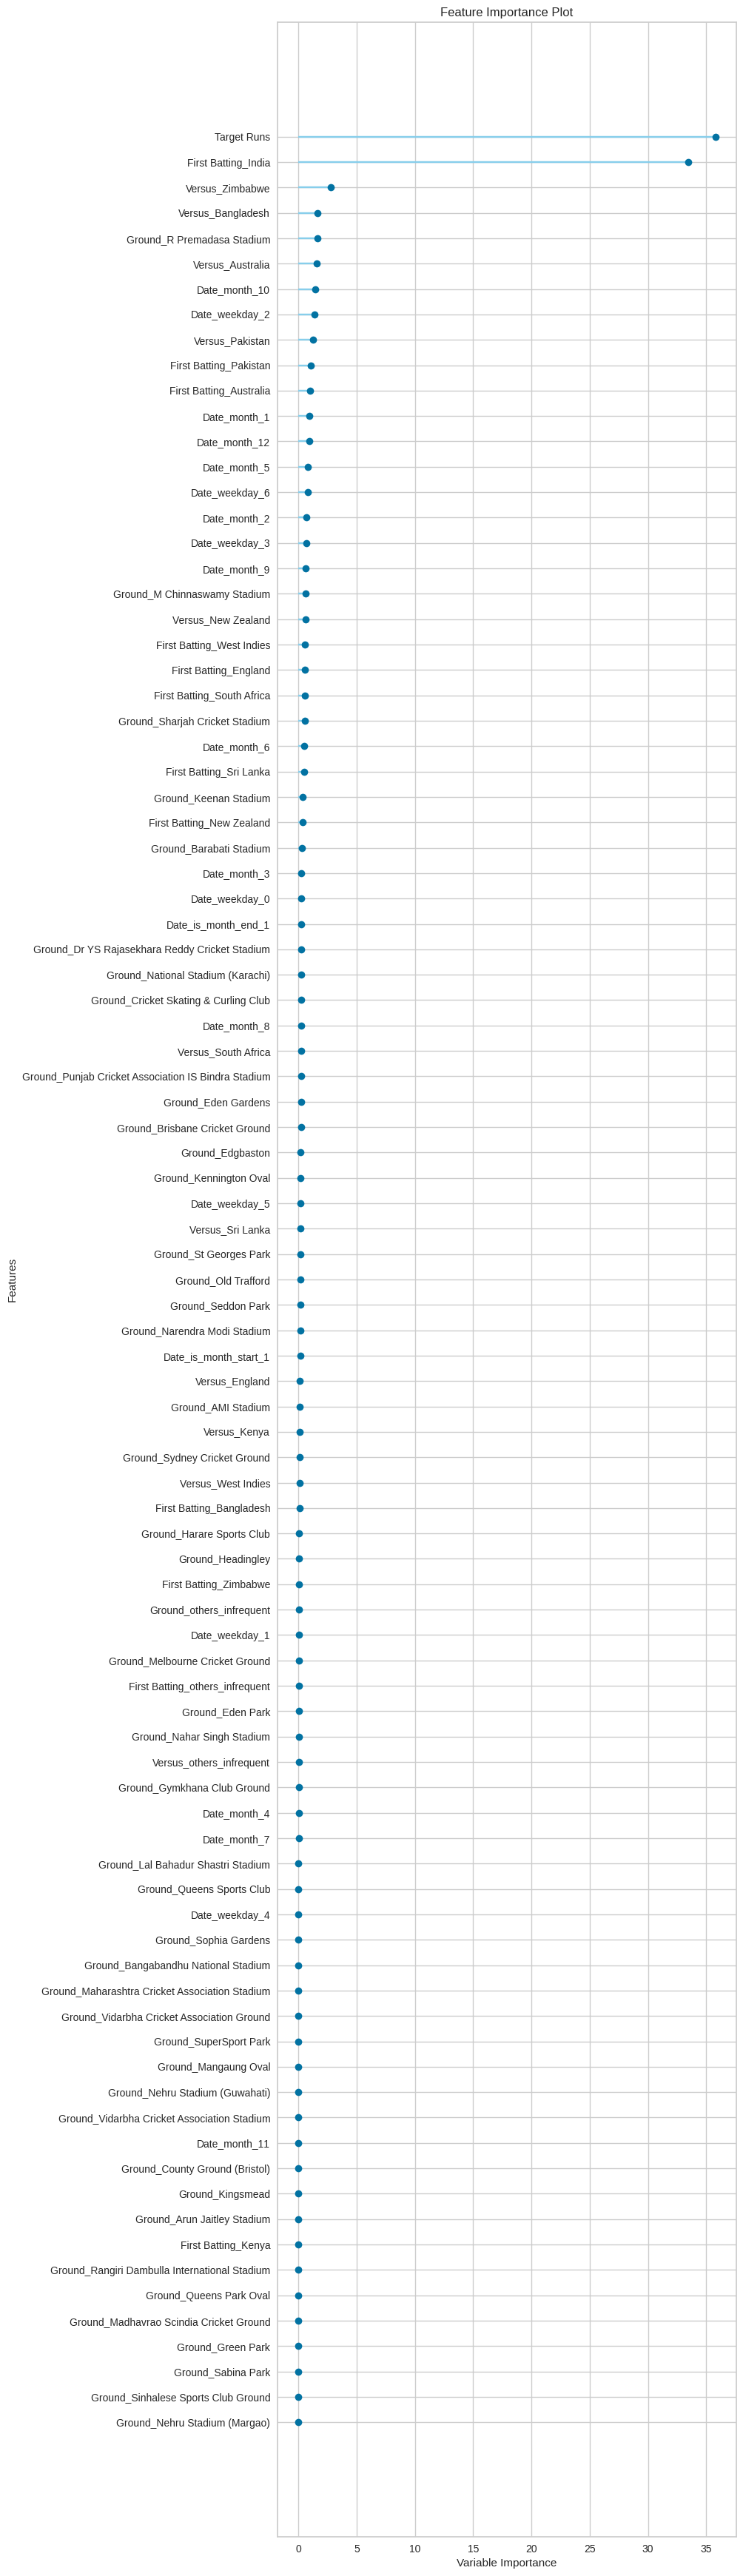

In [ ]:
plot_model(final,plot="feature_all")

>## Other tuning done

>>### rf_tuning

In [ ]:
# params = {"max_depth": np.random.randint(1, (len(get_config('X_train').columns)*.85),20),
#           "max_features": np.random.randint(1, len(df.columns)-1,20),
#           "min_samples_leaf": [2,3,4,5,6],
#           "criterion": ["gini", "entropy"],
#           "n_estimators":[i for i in range(1,100,10)]}
# tuned_rf_custom = tune_model(best_models[],n_iter=50,optimize='AUC',choose_better=True,tuner_verbose=True,search_algorithm='random')




In [ ]:
# tuned_rf_custom

In [ ]:
# plot_model(tuned_rf_custom,"boundary")

In [ ]:
# final = finalize_model(tuned_rf_custom)

In [ ]:
# plot_model(final,"boundary")

>>### xgboost_tuning

In [ ]:
# best_models[0]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', use_label_encoder=True,
              validate_parameters=1, verbosity=0)

In [ ]:
# import decimal
# def float_range(start, stop, step):
#   while start < stop:
#     yield float(start)
#     start += float(decimal.Decimal(step))

In [ ]:
# params={'booster':'gblinear'}

In [ ]:
# tuned_xgboost = tune_model(best_models[0], custom_grid = params,n_iter=50,optimize='AUC',choose_better=True,tuner_verbose=True,search_algorithm='random',)

In [ ]:
# params = {"min_child_weight": [i for i in range(1,len(df_seen.columns))],
#           "max_depth": [i for i in range(1,10)],
#           "colsample_bytree":[i for i in float_range(0.5,1,0.05)],
#           "n_estimators":[i for i in range(1,100,1)],


#           "gamma": [i for i in float_range(0.1,1.5,0.05)],
#           "learning_rate":[ i for i in float_range(.1,.3,.001)],
#           "subsample":[i for i in float_range(0.5,1,0.05)]}
# tuned_xgboost = tune_model(best_models[0], custom_grid = params,n_iter=50,optimize='AUC',choose_better=True,tuner_verbose=True,search_algorithm='random',)

,Accuracy,AUC,Recall,Prec.,F1
0,0.6508,0.7698,0.7353,0.6579,0.6944
1,0.6667,0.7104,0.7353,0.6757,0.7042
2,0.7302,0.7586,0.7941,0.7297,0.7606
3,0.6349,0.7287,0.7059,0.6486,0.6761
4,0.6190,0.6602,0.6471,0.6471,0.6471
5,0.6349,0.6947,0.7353,0.6410,0.6849
6,0.6508,0.7231,0.7647,0.6500,0.7027
7,0.6825,0.7323,0.7059,0.7059,0.7059
8,0.6613,0.7794,0.7941,0.6585,0.7200
9,0.7419,0.7941,0.6970,0.7931,0.7419


In [ ]:
# tuned_xgboost
# 0.7351

In [ ]:
# plot_model(tuned_xgboost,"boundary")

# Pickling the model

This prevents the model from training again and again

In [ ]:
final = finalize_model(tuned_catboost_custom)

In [ ]:
final

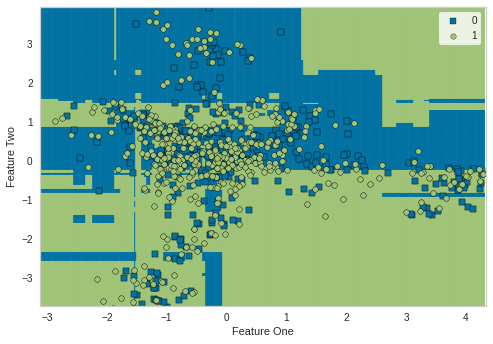

In [ ]:
plot_model(final,"boundary")

In [ ]:
save_model(final,'Scrap_cricket_model')

In [ ]:
new_model = load_model('Scrap_cricket_model ')

Transformation Pipeline and Model Successfully Loaded


# Prediction

In [ ]:
df_seen_pre = df_unseen.drop('Label',axis=1)

In [ ]:
df_seen_pre

In [ ]:
unseen_df_predcit = predict_model(new_model,df_seen_pre)

In [ ]:
df_unseen

,Date,Ground,Versus,Target Runs,First Batting,Label
0,1994-10-17,Nahar Singh Stadium,West Indies,274.0,West Indies,0.0
1,1995-02-22,Carisbrook,Australia,251.0,Australia,1.0
2,1999-08-28,Sinhalese Sports Club Ground,Australia,253.0,Australia,0.0
3,2008-11-17,Holkar Cricket Stadium,England,293.0,India,1.0
4,2015-06-24,Shere Bangla National Stadium,Bangladesh,318.0,India,1.0


In [ ]:
unseen_df_predcit['Label']=unseen_df_predcit['Label'].astype('float64')

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_curve

In [ ]:
confusion_matrix(unseen_df_predcit['Label'],df_unseen['Label'])

array([[2, 1],
       [0, 2]])

In [ ]:
accuracy_score(unseen_df_predcit['Label'],df_unseen['Label'])

0.8

In [ ]:
precision_recall_curve(unseen_df_predcit['Label'],df_unseen['Label'])

(array([0.66666667, 1.        ]), array([1., 0.]), array([1.]))

In [ ]:
df_seen['Label'].value_counts()

1.0    513
0.0    434
Name: Label, dtype: int64

In [ ]:
unseen_df_predcit['Label'].value_counts()

0.0    3
1.0    2
Name: Label, dtype: int64